In [92]:
import cv2
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
from loguru import logger

2024-06-20 11:06:33.384 | INFO     | __main__:<module>:14 - Generated gradient_rgb_mat: (256, 8, 3)


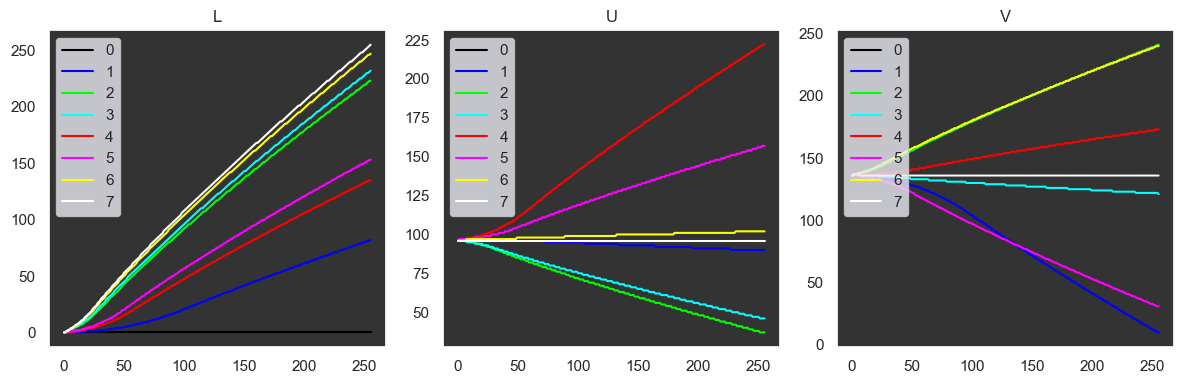

In [94]:
# ----------------------------------------
# ---- Generate 256 x 8 x 3 array ----
# 1. The pure_rgb_mat is 8 x 3 array with 0 and 255 values
#    it refers the full rgb value colors
# 2. The gradient_rgb_mat is the 256 x 8 x 3 array with the 8 array grows from 0 to 255

pure_rgb_mat = []
for r in [0, 255]:
    for g in [0, 255]:
        for b in [0, 255]:
            pure_rgb_mat.append([r, g, b])
pure_rgb_mat = np.array(pure_rgb_mat)
gradient_rgb_mat = np.array([pure_rgb_mat/255*i for i in range(256)], dtype=np.uint8)
logger.info(f'Generated gradient_rgb_mat: {gradient_rgb_mat.shape}')

# ----------------------------------------
# ---- Investigate how the pure rgb colors differ on L ----
luv = cv2.cvtColor(gradient_rgb_mat, cv2.COLOR_RGB2LUV)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.set_theme(context='notebook', style='dark', palette='tab10')

for i, c in enumerate(pure_rgb_mat):
    c = tuple([int(e) / 255 for e in c])
    for j, n in enumerate('luv'):
        ax = axes[j]
        sns.lineplot(ax=ax, data=luv[:, i, j], color=c, label=f'{i}')
        ax.set_title(n.upper())
        ax.set_facecolor('#333333')
        ax.legend(loc='upper left')#, prop={'size': 8})

fig.tight_layout()
plt.show()


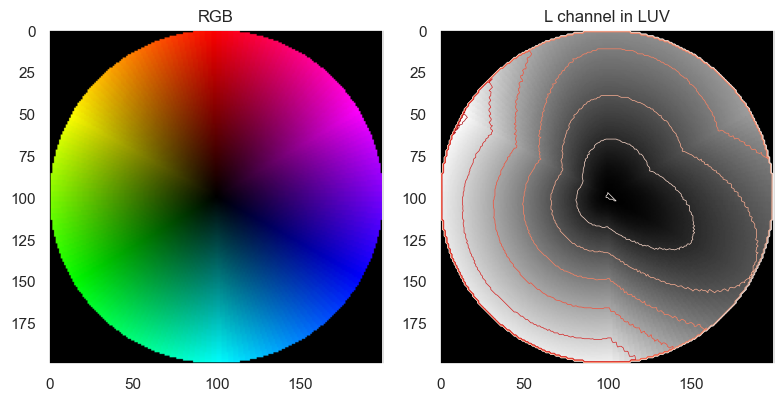

In [163]:
# ----------------------------------------
# ---- Circle graph ----
width = 200
height = 200

mx, my = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))

if False:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes[0]
    _ = ax.imshow(mx)
    plt.colorbar(_, ax=ax, shrink=0.5)
    ax = axes[1]
    _ = ax.imshow(my)
    plt.colorbar(_, ax=ax, shrink=0.5)
    plt.show()


# mr: matrix of radius
# mp: matrix of phi
mr = np.sqrt(mx*mx + my*my)
mp = ((np.atan2(mx, my)/ np.pi) +1) * 0.5
mask = mr < 1

h = mp * 180
s = mp * 0 + 255
l = mr * 255/2

hls = np.zeros((height, width, 3))
hls[:, :, 0][mask] = h[mask]
hls[:, :, 1][mask] = l[mask]
hls[:, :, 2][mask] = s[mask]
hls = hls.astype(np.uint8)

rgb = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
luv = cv2.cvtColor(rgb, cv2.COLOR_RGB2LUV)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes[0]
ax.imshow(rgb)
ax.set_title('RGB')

ax = axes[1]
ax.imshow(luv[:, :, 0], cmap='gray')
ax.contour(luv[:, :, 0], cmap='Reds', linewidths=0.5)
ax.set_title('L channel in LUV')

fig.tight_layout()
plt.show()
